# Machine learning analysis and visualization of the Belarusian ancient flax varieties (Linum usitatissimum L.)

In [1]:
# Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

### Weather conditions during flax vegetation period.

In [2]:
# Load weather conditions - temperature and precipitation during the flax vegetation period (may- august)
df_w = pd.read_excel('~/db/flax_data_manuscript.ods', sheet_name='weather')

In [3]:
# Precipitation, mm and Temperature, C, in may, june, jully and august. 
plt.rcParams.update({'figure.dpi':300})
plt.style.use('ggplot')
g = sns.FacetGrid(df_w, col="year", col_wrap=4, sharex=True)
g = g.map(plt.bar, "month", "T, °C", color="orange", linewidth=1)
for ax, (_, subdata) in zip(g.axes, df_w.groupby('year')):
    ax2=ax.twinx()
    ax2.set_ylim(0, 180)
    ax.set_ylim(0, 60)
    subdata.plot(x="month",y="Rain, mm", ax=ax2,legend=True,color='blue', marker='o')
    ax.set_ylabel('Temperature, °C')  
    ax2.set_ylabel('Precipitation, mm')
    
ax2.yaxis.set_label_position("right")
ax2.yaxis.tick_right()
#g.tight_layout()
plt.clf()

<Figure size 3600x2700 with 0 Axes>

In [4]:
# Plot average temperatures of the vegetation period by year

plt.rcParams.update({'figure.figsize':(7, 4), 'figure.dpi':300})
sns.boxplot(x = 'year', y = 'T, °C', data = df_w, palette = 'dark:salmon', showmeans=True)
plt.ylabel('Temperature, C')
plt.title('Averadge Temperatures during the vegetation period')

plt.clf()

<Figure size 2100x1200 with 0 Axes>

In [5]:
# Plot average precipitation of the vegetation period by year

plt.rcParams.update({'figure.figsize':(7,4), 'figure.dpi':300})
sns.boxplot(x = 'year', y = 'Rain, mm', data = df_w,palette = 'cubehelix', showmeans=True)
plt.ylabel('Precipitation, mm')
plt.title('Averadge Precipitation during the vegetation period')

plt.clf()

<Figure size 2100x1200 with 0 Axes>

## Statistical analysis

In [6]:
# Load database df_1 for analysis
df_1 = pd.read_excel("~/db/flax_data_manuscript.ods", sheet_name='anova')
df_1.head()

,Variety,LIS_plastic,plant_natural_height,n_capsules,n_seeds,stem_length
0,k-6222,1,68,4,8,50
1,k-6222,1,50,5,8,42
2,k-6222,1,51,6,8,45
3,k-6222,1,70,6,9,53
4,k-6222,1,62,11,9,47


In [7]:
# Display columns
df_1.columns

Index(['Variety', 'LIS_plastic', 'plant_natural_height', 'n_capsules',
       'n_seeds', 'stem_length'],
      dtype='object')

In [8]:
# Select numeric features
df_anova = df_1[['LIS_plastic', 'plant_natural_height', 'n_capsules', 'n_seeds',
       'stem_length']]

In [9]:
# Table 1. Basic plant natural height statistics for each group of flax varieties.
print(round(df_anova.groupby('LIS_plastic').describe().plant_natural_height),2)

             count  mean   std   min   25%   50%   75%   max
LIS_plastic                                                 
0             20.0  66.0  10.0  49.0  59.0  68.0  74.0  80.0
1             99.0  60.0   6.0  45.0  56.0  60.0  65.0  71.0
pl           125.0  65.0   6.0  50.0  60.0  65.0  70.0  80.0 2


In [10]:
# Table 2. Basic statistics on the number of seeds for each group of flax varieties. 
print(round(df_anova.groupby('LIS_plastic').describe().n_seeds),2)

             count  mean  std  min  25%  50%  75%   max
LIS_plastic                                            
0             20.0   8.0  1.0  7.0  8.0  8.0  8.0   9.0
1             99.0   8.0  1.0  5.0  7.0  8.0  8.0  10.0
pl           125.0   8.0  1.0  6.0  8.0  8.0  9.0  10.0 2


In [11]:
# Slice dataframe - plants with insertion
df_ins = df_anova[df_anova['LIS_plastic'] == 1]

In [12]:
# Get basic statistics
round(df_ins.describe(),2)

,plant_natural_height,n_capsules,n_seeds,stem_length
count,99.00,99.00,99.00,99.00
mean,60.14,6.90,7.75,48.17
std,6.07,2.05,1.15,5.59
min,45.00,4.00,5.00,30.00
25%,56.50,5.00,7.00,43.50
50%,60.00,7.00,8.00,50.00
75%,65.00,8.00,8.50,51.50
max,71.00,13.00,10.00,62.00


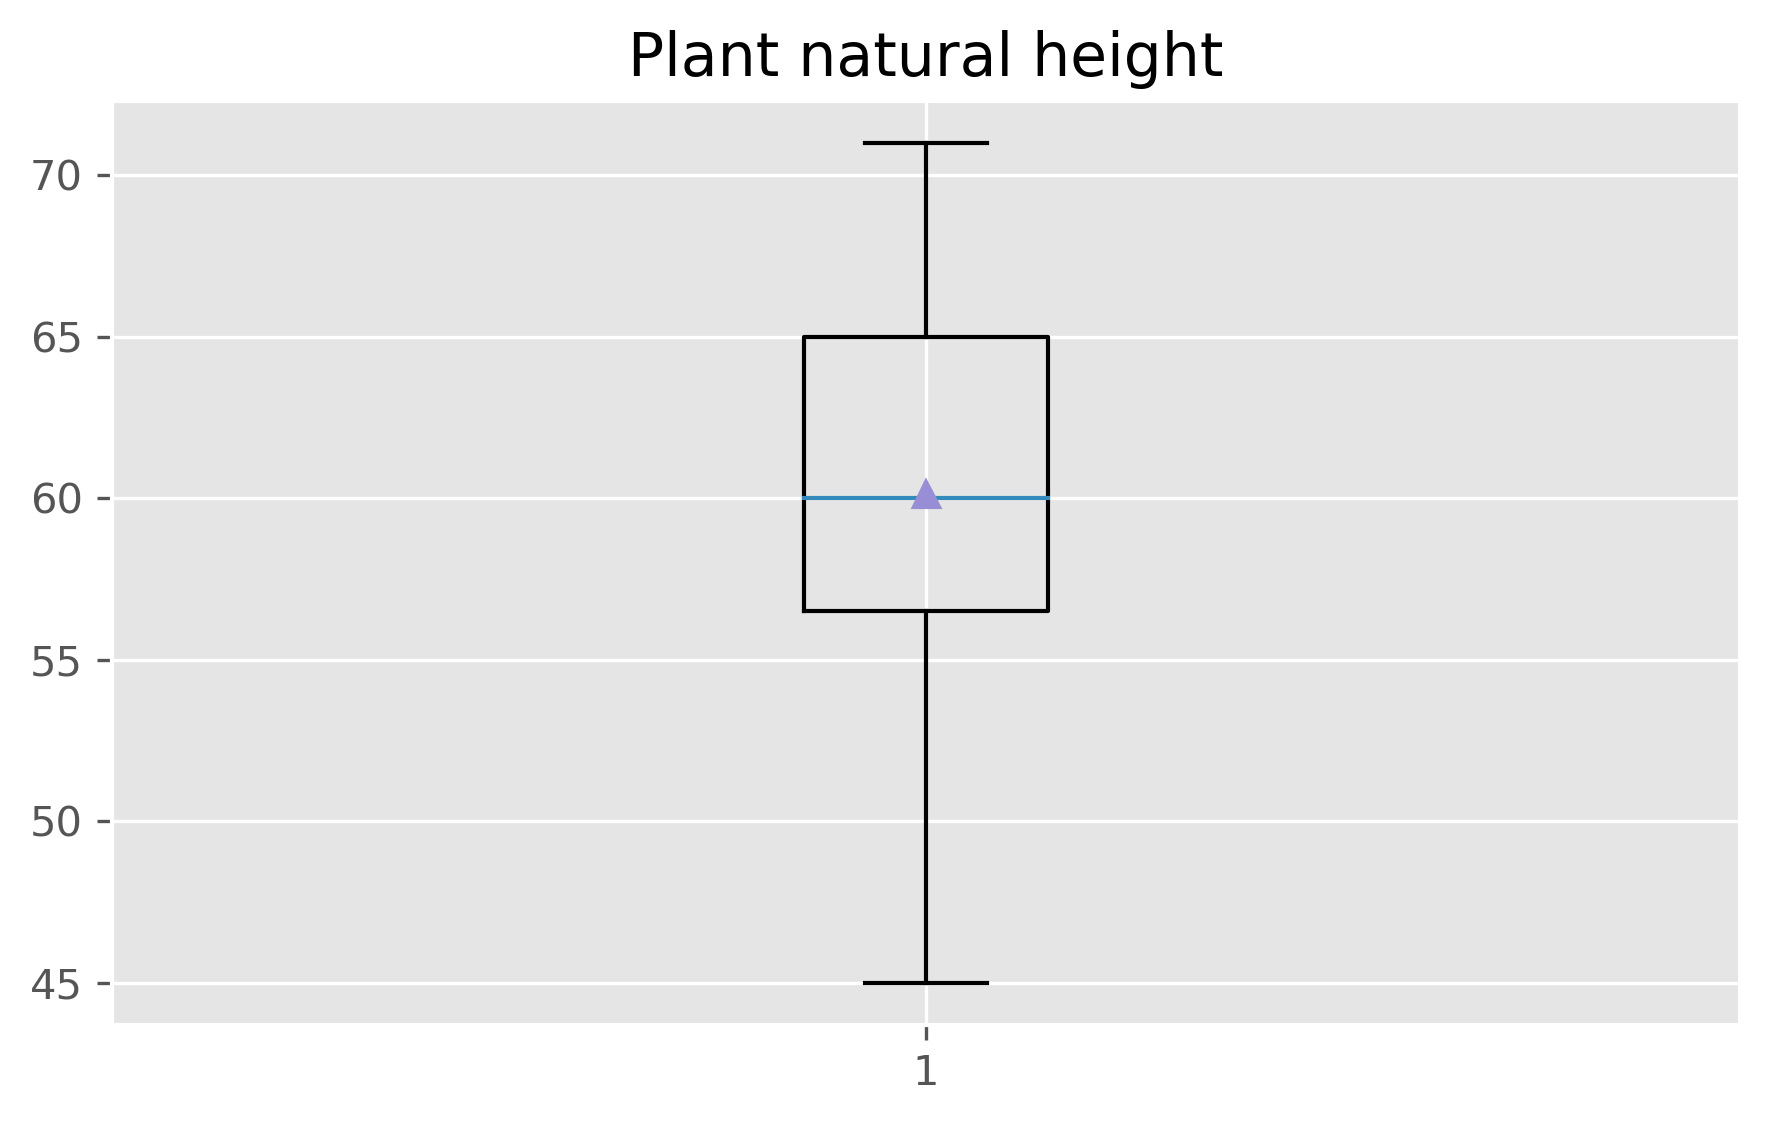

In [13]:
# Vizualize feature 'plant_natural_height' for plants with insertion - no outliers detected
plt.rcParams.update({'figure.figsize':(7,4), 'figure.dpi':300})
plt.boxplot(df_ins['plant_natural_height'], showmeans= True)
plt.title('Plant natural height')
plt.show()

In [14]:
# Slice dataframe - plants with no insertion
df_no_ins = df_anova[df_anova['LIS_plastic'] == 0]

In [15]:
# Get basic statistics
round(df_no_ins.describe(),2)

,plant_natural_height,n_capsules,n_seeds,stem_length
count,20.00,20.00,20.00,20.00
mean,65.65,6.70,8.00,55.65
std,9.76,2.39,0.73,10.15
min,49.00,4.00,7.00,37.00
25%,59.00,5.00,7.75,48.50
50%,68.00,7.00,8.00,60.00
75%,74.00,8.00,8.25,63.25
max,80.00,14.00,9.00,67.00


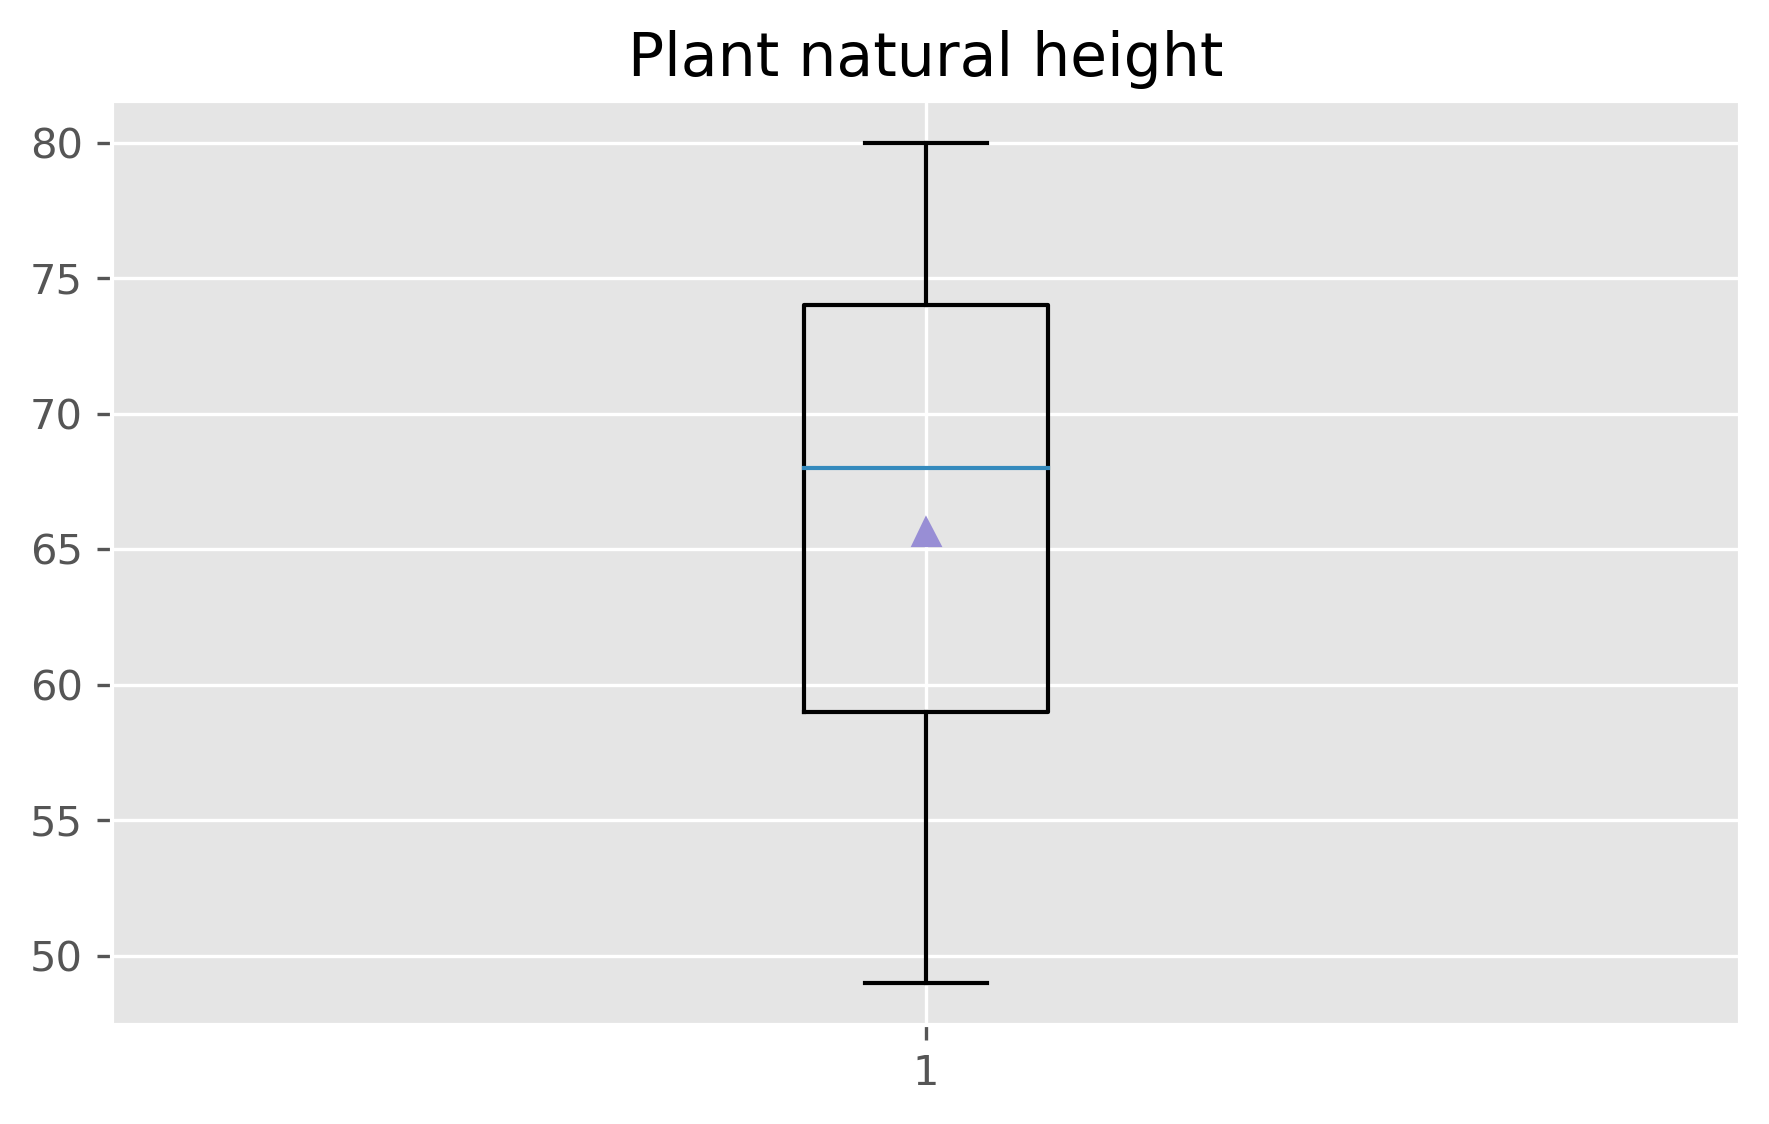

In [16]:
# Vizualize feature 'plant_natural_height' for plants with no insertion - no outliers detected
plt.boxplot(df_no_ins['plant_natural_height'], showmeans= True)
plt.title('Plant natural height')
plt.show()

In [17]:
# Slice dataframe - heterozygote plants
df_pl = df_anova[df_anova['LIS_plastic'] == 'pl']

In [18]:
# Get basic statistics
round(df_pl.describe(),2)

,plant_natural_height,n_capsules,n_seeds,stem_length
count,125.00,125.00,125.00,125.00
mean,64.98,6.50,8.17,51.12
std,5.86,2.49,0.83,5.37
min,50.00,1.00,6.00,33.00
25%,60.00,5.00,8.00,48.00
50%,65.00,6.00,8.00,51.00
75%,70.00,8.00,9.00,55.00
max,80.00,20.00,10.00,62.00


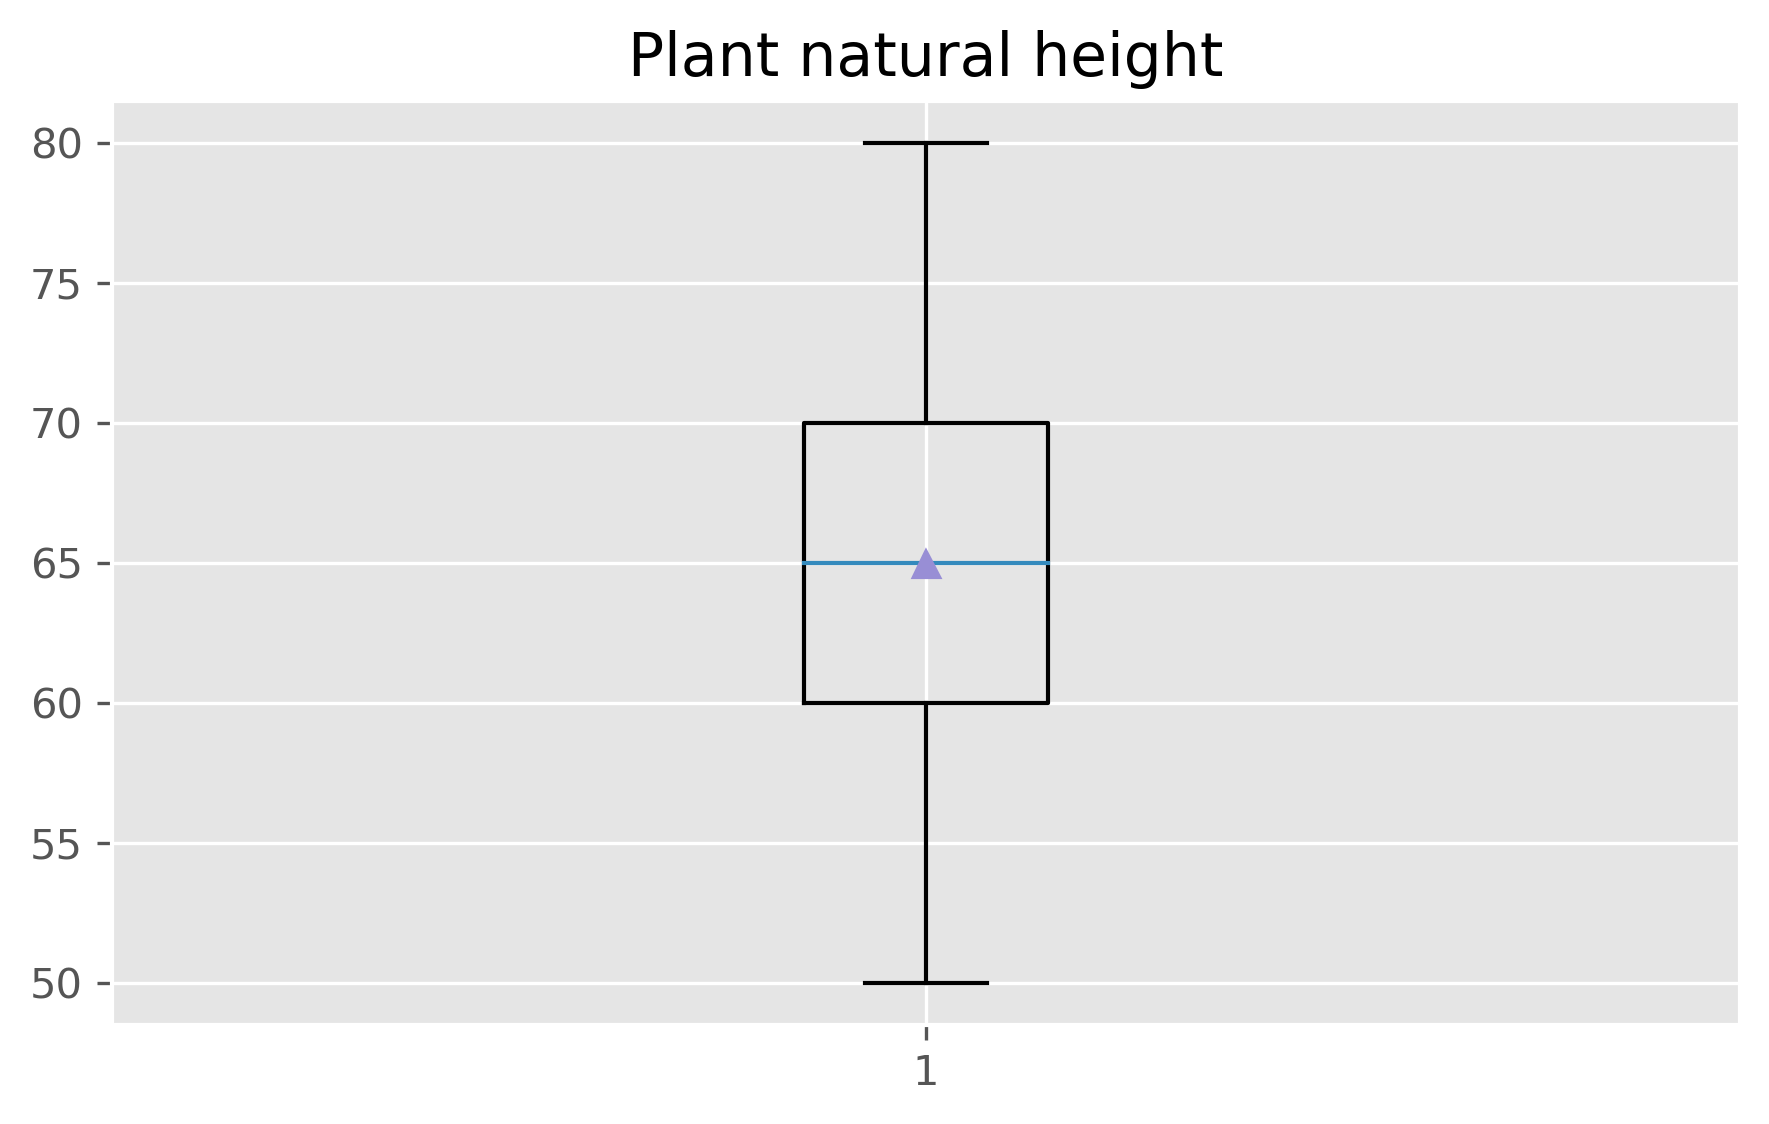

In [19]:
# Vizualize feature 'plant_natural_height' for plants with no insertion - no outliers detected
plt.boxplot(df_pl['plant_natural_height'], showmeans= True)
plt.title('Plant natural height')
plt.show()

In [20]:
# Perfom Levene test to check gomoscedasticity (homogeneity of variance)
stats.levene(df_ins['n_seeds'],
             df_no_ins['n_seeds'],
            df_pl['n_seeds'])

LeveneResult(statistic=2.7488977505534913, pvalue=0.06600583917092001)

In [21]:
# Extract individual groups
ins_l = df_ins.loc[(df_ins['LIS_plastic'] == 1), ['n_seeds']]
no_ins_l = df_no_ins.loc[(df_no_ins['LIS_plastic'] == 0), ['n_seeds']]
pl_l = df_pl.loc[(df_pl['LIS_plastic'] == 'pl'), ['n_seeds']]

In [22]:
# ANOVA run to compare groups with insertion and 'pl' group by number of seeds
fvalue, pvalue = stats.f_oneway(ins_l, pl_l)
print(fvalue, pvalue)

[10.12740692] [0.00166994]


In [23]:
# ANOVA run to compare groups with insertion and withought it by number of seeds
fvalue, pvalue = stats.f_oneway(ins_l, no_ins_l)
print(fvalue, pvalue)

[0.89511405] [0.34604506]


In [24]:
# Perform the Brown-Forsythe Test to check gomoscedasticity (homogeneity of variance)
stats.levene(df_ins['plant_natural_height'],
             df_no_ins['plant_natural_height'],
            center = 'median')

LeveneResult(statistic=9.88333545366465, pvalue=0.002113996483139355)

In [25]:
# Perform the Brown-Forsythe Test
stats.levene(df_ins['plant_natural_height'],
             df_pl['plant_natural_height'],
            center = 'median')

LeveneResult(statistic=0.0058353717370665786, pvalue=0.9391779372707628)

In [26]:
# Extract individual groups
ins = df_ins.loc[(df_ins['LIS_plastic'] == 1), ['plant_natural_height']]
no_ins = df_no_ins.loc[(df_no_ins['LIS_plastic'] == 0), ['plant_natural_height']]
pl = df_pl.loc[(df_pl['LIS_plastic'] == 'pl'), ['plant_natural_height']]


In [27]:
# ANOVA run to compare groups pl and ins (1)
fvalue, pvalue = stats.f_oneway(pl, ins)
print(fvalue, pvalue)

[36.42014446] [6.60099227e-09]


In [28]:
# Non-parametric test to compare groups ins (1) and no_ins (0)
stats.mannwhitneyu(x=ins, y=no_ins, alternative = 'two-sided')

MannwhitneyuResult(statistic=array([604.]), pvalue=array([0.0059963]))

In [29]:
# Figure 9. Distribution of groups of flax varieties along the length of the plant.
plt.style.use('ggplot')
plt.rcParams.update({'figure.dpi':300})
#plt.style.use('fivethirtyeight')
f,ax = plt.subplots(figsize = (7,5))
sns.histplot(df_ins[df_ins.LIS_plastic == 1].plant_natural_height, ax = ax, label = 'insertion', color = 'black', alpha=.5, edgecolor=(1, 1, 1, .4))
sns.histplot(df_no_ins[df_no_ins.LIS_plastic == 0].plant_natural_height, ax = ax, label = 'no_insertion', color = 'indigo', alpha=.8, edgecolor=(1, 1, 1, .4))
sns.histplot(df_pl[df_pl.LIS_plastic == 'pl'].plant_natural_height, ax = ax, label = 'pl', color = 'gold', alpha=.8, edgecolor=(1, 1, 1, .4))   
sns.rugplot(df_anova, x="plant_natural_height")
plt.title('Natural height of the plants shown by category') #Number of plants of a certain height shown by category
plt.xlabel('Plant Natural Height, sm')
plt.ylabel('Number of Plants')
#ax.set_yscale('log')
plt.legend()

plt.clf()

<Figure size 2100x1500 with 0 Axes>

# Bionformatics analysis

In [30]:
# Load database df_nums
df_nums = pd.read_excel("~/db/flax_data_manuscript.ods", sheet_name='ml')
df_nums.head()

,variety,lis_hetero,hairs_number,plant_natural_height,n_capsules,n_seeds,stem_length,hypo_antho
0,k-6222,1,HH,70,10,9,57,missed
1,k-6222,1,Hh,65,10,8,45,missed
2,k-6222,1,HH,79,11,9,62,missed
3,k-6222,1,Hh,72,9,8,48,missed
4,k-6222,1,Hh,61,4,7,53,missed


In [31]:
# Get info about data - data types, missing values
df_nums.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   variety               56 non-null     object
 1   lis_hetero            56 non-null     int64 
 2   hairs_number          56 non-null     object
 3   plant_natural_height  56 non-null     int64 
 4   n_capsules            56 non-null     int64 
 5   n_seeds               56 non-null     int64 
 6   stem_length           56 non-null     int64 
 7   hypo_antho            56 non-null     object
dtypes: int64(5), object(3)
memory usage: 3.6+ KB


In [32]:
# Disrtibutioin of the feature hary septa across flax varieties is shown
plt.rcParams.update({'figure.figsize':(8,5), 'figure.dpi':300})
sns.countplot(x='variety', data=df_nums, hue='hairs_number')
plt.title("Ciliation of septa by number of hairs across flax varieties")
plt.xlabel('Variety')

plt.clf()

<Figure size 2400x1500 with 0 Axes>

In [33]:
# Disrtibutioin of the feature hary septa across flax varieties is shown
plt.rcParams.update({'figure.figsize':(8,5), 'figure.dpi':300})
sns.countplot(x='lis_hetero', data=df_nums, hue='hairs_number')
plt.title("Ciliation of septa by number of hairs across LIS-1 groups")
plt.xlabel('Group by LIS-1')
plt.ylabel('Number of Plants')

plt.clf()

<Figure size 2400x1500 with 0 Axes>

### Dataset preparation

In [34]:
# Import modul 
from sklearn.preprocessing import StandardScaler

In [35]:
# Transform categorical features to dummy format
df_cat = pd.get_dummies(df_nums[['hairs_number', 'hypo_antho']], drop_first=True)

In [36]:
# Get numeric features
X_nums = df_nums.drop(['hairs_number', 'hypo_antho'], axis=1)

In [37]:
# Concatenate encoded categorical features and numeric features
X_combo = pd.concat([df_cat, X_nums], axis=1)

In [38]:
# Increasing the dataset size in 3 times as we have originally only 56 samples
X_sample = X_combo.sample(frac=3, replace=True, random_state=1)

In [39]:
# Drop unnecessary fearures 
X = X_sample.drop(['variety'], axis=1)

In [40]:
# Get info about datatypes and missing values
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168 entries, 37 to 18
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   hairs_number_Hh       168 non-null    uint8
 1   hairs_number_hh       168 non-null    uint8
 2   hypo_antho_weak       168 non-null    uint8
 3   lis_hetero            168 non-null    int64
 4   plant_natural_height  168 non-null    int64
 5   n_capsules            168 non-null    int64
 6   n_seeds               168 non-null    int64
 7   stem_length           168 non-null    int64
dtypes: int64(5), uint8(3)
memory usage: 8.4 KB


## ML model - Random Forest Classifier and LIS-1 presence prediction

In [41]:
# Split dataset to target variable and features
X_forest = X.drop(columns=['lis_hetero'], axis=1)
X_forest.columns

Index(['hairs_number_Hh', 'hairs_number_hh', 'hypo_antho_weak',
       'plant_natural_height', 'n_capsules', 'n_seeds', 'stem_length'],
      dtype='object')

In [42]:
# Labels for prediction
y = X_sample[['lis_hetero']]
y_forest = y

In [43]:
# Split data to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_forest, y_forest, test_size=0.3, 
                                                    random_state=46, stratify=y_forest)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [44]:
# Data standartization
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [45]:
# GridsearchCV and hyperparameters tunning to find the best solution for prediction
# Create the parameter grid
param_grid = {
    'bootstrap': [True, False],
    'max_depth': [3, 5, 7, 10],
    'criterion': ['gini', 'entropy'],
    'n_estimators': [600, 800, 1000]
}
# Use KFold cross-validation when split the data

kf = KFold(n_splits=10, shuffle=True, random_state=43)

# Create a based model
forest = RandomForestClassifier(random_state=13)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = forest, param_grid = param_grid, 
                          cv = kf, n_jobs = -1, verbose = 1, error_score='raise')


In [46]:
# Fit the grid search to the data
grid_search.fit(X_train_std, y_train.ravel())

Fitting 10 folds for each of 48 candidates, totalling 480 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=43, shuffle=True),
             error_score='raise',
             estimator=RandomForestClassifier(random_state=13), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'n_estimators': [600, 800, 1000]},
             verbose=1)

In [47]:
#Find the best values
print("The best parameters: {0}".format(grid_search.best_params_))

The best parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 7, 'n_estimators': 1000}


In [48]:
# Set the best params to classificator
forest.set_params(**grid_search.best_params_)

RandomForestClassifier(criterion='entropy', max_depth=7, n_estimators=1000,
                       random_state=13)

In [49]:
# Print hyperparameters used
from pprint import pprint
print('Parameters currently in use:\n')
pprint(forest.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1000,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 13,
 'verbose': 0,
 'warm_start': False}


### Prediction of LIS_1 based on the data

In [50]:
# Fit the model on train data
forest.fit(X_train_std, y_train.ravel())
display(forest.score(X_train_std, y_train))

0.9914529914529915

In [51]:
# Predict the test set
y_pred = forest.predict(X_test_std)
accuracy = accuracy_score(y_pred, y_test) * 100
print("Accuracy with RandomForest: {0:.6f}%".format(accuracy))

Accuracy with RandomForest: 98.039216%


In [52]:
# The confusion matrix shows prediction results
conf_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred), index = ['actual 0', 'actual 1', 'actual 2'], 
                           columns = ['predicted 0', 'predicted 1', 'predicted 2'])
plt.rcParams.update({'figure.figsize':(6,4), 'figure.dpi':300})
display(sns.heatmap(conf_matrix, annot=True, cmap='rocket_r'))
plt.clf()

<Axes: >

<Figure size 1800x1200 with 0 Axes>

In [53]:
#Classification accuracy
from sklearn.metrics import classification_report

#Classification accuracy
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.97      0.99        35
           2       0.88      1.00      0.93         7

    accuracy                           0.98        51
   macro avg       0.96      0.99      0.97        51
weighted avg       0.98      0.98      0.98        51



In [54]:
# Features and its importances estimated with Random Forest Classifier
feature_imp = pd.Series(forest.feature_importances_,index=X_forest.columns).sort_values(ascending=False)
feature_imp

stem_length             0.202328
plant_natural_height    0.201680
n_capsules              0.187276
hairs_number_hh         0.131706
n_seeds                 0.113984
hypo_antho_weak         0.098699
hairs_number_Hh         0.064328
dtype: float64

In [55]:
# Bar plot of features and its importances estimated with Random Forest Classifier
plt.style.use('ggplot')
plt.rcParams.update({'figure.figsize':(8,3), 'figure.dpi':300})
sns.barplot(x=feature_imp, y=feature_imp.index,  palette = 'rocket')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Important Features')

plt.clf()

<Figure size 2400x900 with 0 Axes>